# Import libraries

In [ ]:
# To work with data arrays
import numpy as np

# To work with tabular data
import fireducks.pandas as pd # use fireducks as a faster alternative to pandas

# Utilities library
from keras import utils

# To work with models
from keras.models import Sequential, Model

# Layers
from keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, Input, concatenate
from keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D

# Optimizers
from keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop

# Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer

# Data normalization
from sklearn.preprocessing import StandardScaler

# Regular expressions
import re

# To work with graphs
import matplotlib.pyplot as plt

# Metrics for error calculation
from sklearn.metrics import mean_squared_error, mean_absolute_error

# To convert string to json format
import json

%matplotlib inline

# Loading data

In [ ]:
!wget https://storage.yandexcloud.net/academy.ai/japan_cars_dataset.csv

--2025-02-08 05:51:33--  https://storage.yandexcloud.net/academy.ai/japan_cars_dataset.csv
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 136735 (134K) [text/csv]
Saving to: ‘japan_cars_dataset.csv’

japan_cars_dataset. 100%[===================>] 133.53K   245KB/s    in 0.5s    

2025-02-08 05:51:34 (245 KB/s) - ‘japan_cars_dataset.csv’ saved [136735/136735]



In [ ]:
# Read database file
cars = pd.read_csv('japan_cars_dataset.csv', sep=',')

# Delete lines with empty values
cars = cars.dropna()

# Output the data form
print('Data shape: ', cars.shape)

Форма данных:  (2318, 11)


In [ ]:
# Bringing up the first 10 cars
cars.head(10)

Unnamed: 0 
 price 
 mark 
 model 
 year 
 mileage 
 engine_capacity 
 transmission 
 drive 
 hand_drive 
 fuel 
 
 
 
 
 0 
 0 
 80 
 nissan 
 march 
 2003 
 80000 
 1240 
 at 
 2wd 
 rhd 
 gasoline 
 
 
 1 
 1 
 110 
 nissan 
 march 
 2010 
 53000 
 1200 
 at 
 2wd 
 rhd 
 gasoline 
 
 
 2 
 2 
 165 
 nissan 
 lafesta 
 2005 
 47690 
 2000 
 at 
 2wd 
 rhd 
 gasoline 
 
 
 3 
 3 
 190 
 toyota 
 avensis 
 2008 
 130661 
 1990 
 at 
 2wd 
 rhd 
 gasoline 
 
 
 4 
 4 
 190 
 daihatsu 
 mira 
 2006 
 66300 
 660 
 at 
 2wd 
 rhd 
 gasoline 
 
 
 5 
 5 
 190 
 daihatsu 
 mira 
 2004 
 81400 
 660 
 at 
 2wd 
 rhd 
 gasoline 
 
 
 6 
 8 
 220 
 nissan 
 march 
 2010 
 117000 
 1200 
 at 
 2wd 
 rhd 
 gasoline 
 
 
 7 
 9 
 230 
 volkswagen 
 passat 
 2008 
 127763 
 3190 
 at 
 4wd 
 rhd 
 gasoline 
 
 
 8 
 10 
 275 
 mazda 
 bongo van 
 2010 
 178218 
 1800 
 mt 
 2wd 
 rhd 
 gasoline 
 
 
 9 
 11 
 283 
 honda 
 step wgn 
 2005 
 121655 
 2000 
 at 
 2wd 
 rhd 
 gasoline

In [ ]:
print(cars['transmission'].value_counts())

transmission
at     2171
mt      117
cvt      30
Name: count, dtype: int64


In [ ]:
print(cars['drive'].value_counts())

drive
2wd    2121
4wd     192
awd       5
Name: count, dtype: int64


In [ ]:
print(cars['hand_drive'].value_counts())

hand_drive
rhd       2301
lhd         16
center       1
Name: count, dtype: int64


In [ ]:
print(cars['fuel'].value_counts())

fuel
gasoline    2290
diesel        18
lpg            7
hybrid         2
cng            1
Name: count, dtype: int64


transmission, drive, hand_drive, fuel can be deleted because the values are the same except for a small percentage, which will not affect the entire amount of data.

In [ ]:
# Delete unnecessary columns
cars.drop(['Unnamed: 0', 'transmission', 'drive', 'hand_drive', 'fuel'], inplace=True, axis=1)

In [ ]:
cars.head(10)

price 
 mark 
 model 
 year 
 mileage 
 engine_capacity 
 
 
 
 
 0 
 80 
 nissan 
 march 
 2003 
 80000 
 1240 
 
 
 1 
 110 
 nissan 
 march 
 2010 
 53000 
 1200 
 
 
 2 
 165 
 nissan 
 lafesta 
 2005 
 47690 
 2000 
 
 
 3 
 190 
 toyota 
 avensis 
 2008 
 130661 
 1990 
 
 
 4 
 190 
 daihatsu 
 mira 
 2006 
 66300 
 660 
 
 
 5 
 190 
 daihatsu 
 mira 
 2004 
 81400 
 660 
 
 
 6 
 220 
 nissan 
 march 
 2010 
 117000 
 1200 
 
 
 7 
 230 
 volkswagen 
 passat 
 2008 
 127763 
 3190 
 
 
 8 
 275 
 mazda 
 bongo van 
 2010 
 178218 
 1800 
 
 
 9 
 283 
 honda 
 step wgn 
 2005 
 121655 
 2000

# Data processing

In [ ]:
# Sample data
n = 3 # Index in the cars table
for i in range(len(cars.values[n])) # Output the value of each column
    print('{} {:>20} {}'.format(i, cars.columns[i], cars.values[n][i]))

0                price 190
1                 mark toyota
2                model avensis
3                 year 2008
4              mileage 130661
5      engine_capacity 1990


In [ ]:
# Check for Null values
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   price            2318 non-null   int64 
 1   mark             2318 non-null   object
 2   model            2318 non-null   object
 3   year             2318 non-null   int64 
 4   mileage          2318 non-null   int64 
 5   engine_capacity  2318 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 108.8+ KB


# Extract data from classes

**Car's model extraction**

In [ ]:
print(cars['mark'].value_counts())

mark
toyota           1047
honda             382
nissan            320
mazda             148
suzuki            126
mitsubishi         65
daihatsu           56
subaru             54
volkswagen         52
bmw                27
hyundai             9
mercedes-benz       5
kia motors          4
isuzu               3
audi                3
smart               2
land rover          2
peugeot             2
volvo               2
kubota              1
chrysler            1
gm                  1
opel                1
citroen             1
mitsuoka            1
ford                1
hino                1
jaguar              1
Name: count, dtype: int64


Most of the cars in the dataset belong to the most popular brands: Toyota, Hodna, Nissan, Mazda, Suzuki. The remaining brands can be categorized in one group “Other”.

In [ ]:
mark_class = {'toyota' : 0,
              'honda'  : 1,
              'nissan' : 2,
              'mazda'  : 3,
              'suzuki' : 4,
              'Прочие-марки' : 5
             }

In [ ]:
# Convert mark information to one hot encoding
def mark2OHE(param):
    # Define the dimensions of the output vector as the number of unique classes
    num_classes = len(set(mark_class.values()))

    # If we could not parse, the field is not populated,
    # then set the default value (the last element in the dictionary)
    if not isinstance(param, str):
        param = list(mark_class.keys())[-1]

    # Split the string into words
    split_array = re.split(r'[ ,.:()?!]', param)

    # Search for a brand in the string and assign it to a class
    for word in split_array:
        mark_cls = mark_class.get(word, -1)
        if mark_cls >= 0:
            break
    else:
        # Auto is not in mark_class - so its class is “Other-marks”
        mark_cls = num_classes - 1

    # Return as OHE vector
    return utils.to_categorical(mark_cls, num_classes)

In [ ]:
# Let's check
N = 6
print('Mark: ', cars.mark[N])
print('Mark in OHE format: ', mark2OHE(cars.mark[N]))

Марка:  nissan
Марка в формате OHE:  [0. 0. 1. 0. 0. 0.]


**The year of manufacture extraction**

In [ ]:
# Year threshold list
year_class = [1979, 1982, 1985, 1989, 1993, 1997, 2000, 2004, 2007, 2011, 2015]

In [ ]:
# Define a universal function for converting a number to the OHE range
def year2OHE(param, class_list):
    # Define the dimensionality of the output vector as the number of unique classes
    num_classes = len(class_list) + 1

    # Find an interval for the input value
    for i in range(num_classes - 1):
        if float(param) < class_list[i]:
            cls = i # Interval found, class selection
            break
    else:
        cls = 0 # Interval not found, select first class

    # Return as an OHE vector
    return utils.to_categorical(cls, num_classes)

In [ ]:
N = 9
print('Year of manufacture: ', cars.year[N])
print('Year of manufacture in OHE format: ', year2OHE(cars.year[N], year_class))

Год выпуска:  2005
Год выпуска в формате OHE:  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


**Model Data Retrieval**

In [ ]:
# Convert text data into numeric data for neural network training
# Use the tokenizer built into Keras to partition the text and build a frequency dictionary
tokenizer = Tokenizer(
      num_words = 300, # vocabulary size
      filters = '!“”"#$#%&()*+,---./:;<=>?@[\\]^_`{|}~\t\n\xa0', # remove extra characters
      lower = True, # lower case
      split = ' ', # split words
      oov_token = 'unknown', # token for words not in the dictionary
      char_level = False # split by words, not by single characters
)

# Build a frequency dictionary by models
tokenizer.fit_on_texts(cars['model'])

In [ ]:
items = list(tokenizer.word_index.items())  # Get word indexes
print(items[:50]) # View the top 50
print(“Dictionary size”, len(items))         # Dictionary length

[('unknown', 1), ('fit', 2), ('vitz', 3), ('passo', 4), ('ist', 5), ('ractis', 6), ('note', 7), ('x', 8), ('demio', 9), ('wish', 10), ('swift', 11), ('truck', 12), ('march', 13), ('mark', 14), ('sienta', 15), ('raum', 16), ('cube', 17), ('corolla', 18), ('noah', 19), ('alphard', 20), ('van', 21), ('tiida', 22), ('wagon', 23), ('polo', 24), ('spacio', 25), ('verisa', 26), ('trail', 27), ('voxy', 28), ('cargo', 29), ('pajero', 30), ('mini', 31), ('series', 32), ('legacy', 33), ('golf', 34), ('carry', 35), ('fun', 36), ('bongo', 37), ('step', 38), ('wgn', 39), ('insight', 40), ('brevis', 41), ('mira', 42), ('v', 43), ('3', 44), ('bluebird', 45), ('sylphy', 46), ('elgrand', 47), ('move', 48), ('bb', 49), ('vanette', 50)]
Размер словаря 262


In [ ]:
# Convert text into a sequence of indices
model_seq = tokenizer.texts_to_sequences(cars['model'])

In [ ]:
# Convert index sequences into a bag of words
x_train_model = tokenizer.sequences_to_matrix(model_seq)

In [ ]:
# Checking the result
print(x_train_model.shape)
print(x_train_model[5][0:100])

(2318, 300)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [ ]:
# Checking the resulting data
n = 5
print(cars['model'][n]) # Model data in text
print(model_seq[n]) # Model data in word indexes
print(x_train_model[n][0:100]) # Model data in bag of words

mira
[42]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [ ]:
# Freeing memory from intermediate data
del model_seq, tokenizer

**Обучающая выборка по числовым данным**

In [ ]:
# Fix column indexes
COL_PRICE           = cars.columns.get_loc('price')
COL_MARK            = cars.columns.get_loc('mark')
COL_MODEL           = cars.columns.get_loc('model')
COL_YEAR            = cars.columns.get_loc('year')
COL_MILEAGE         = cars.columns.get_loc('mileage')
COL_ENGINE_CAPACITY = cars.columns.get_loc('engine_capacity')


def get_row_data(row):
    # Combining all input data into one common vector
    x_data = np.hstack([
                mark2OHE(row[COL_MARK]),
                year2OHE(row[COL_YEAR], year_class),
                row[COL_MILEAGE],
                row[COL_ENGINE_CAPACITY]
              ])

    # Price vector in thousands
    y_data = np.array([row[COL_PRICE]]) / 1000


    return x_data, y_data

def get_train_data(dataFrame):
    x_data = []
    y_data = []

    for row in dataFrame.values:
        x, y = get_row_data(row)
        x_data.append(x)
        y_data.append(y)

    return np.array(x_data), np.array(y_data)

In [ ]:
# Generating a sample from a loaded data set
x_train, y_train = get_train_data(cars)

**Numerical data normalization**

In [ ]:
# To normalize the data, we use an off-the-shelf tool
x_scaler = StandardScaler()
y_scaler = StandardScaler()

# Normalize the output data to a standard normal distribution
x_train_scaled = y_scaler.fit_transform(x_train)
y_train_scaled = y_scaler.fit_transform(y_train)

# Model Architecture

In [ ]:
input1 = Input((x_train_scaled.shape[1],))
input2 = Input((x_train_model.shape[1],))

# First input for numeric data
x1 = Dense(20, activation='relu')(input1)
x1 = Dense(500, activation='relu')(x1)
x1 = Dense(200, activation='relu')(x1)

# Second input for model data
x2 = Dense(20, activation='relu')(input2)
x2 = Dense(200, activation='relu')(x2)
x2 = Dropout(0.3)(x2)

# Concatenate two branches
x = concatenate([x1, x2])

# Intermediate layer
x = Dense(30, activation='relu')(x)
x = Dropout(0.3)(x)

# Final regressing neuron
x = Dense(1, activation='linear')(x)

# Transfer to model
model = Model((input1, input2), x)

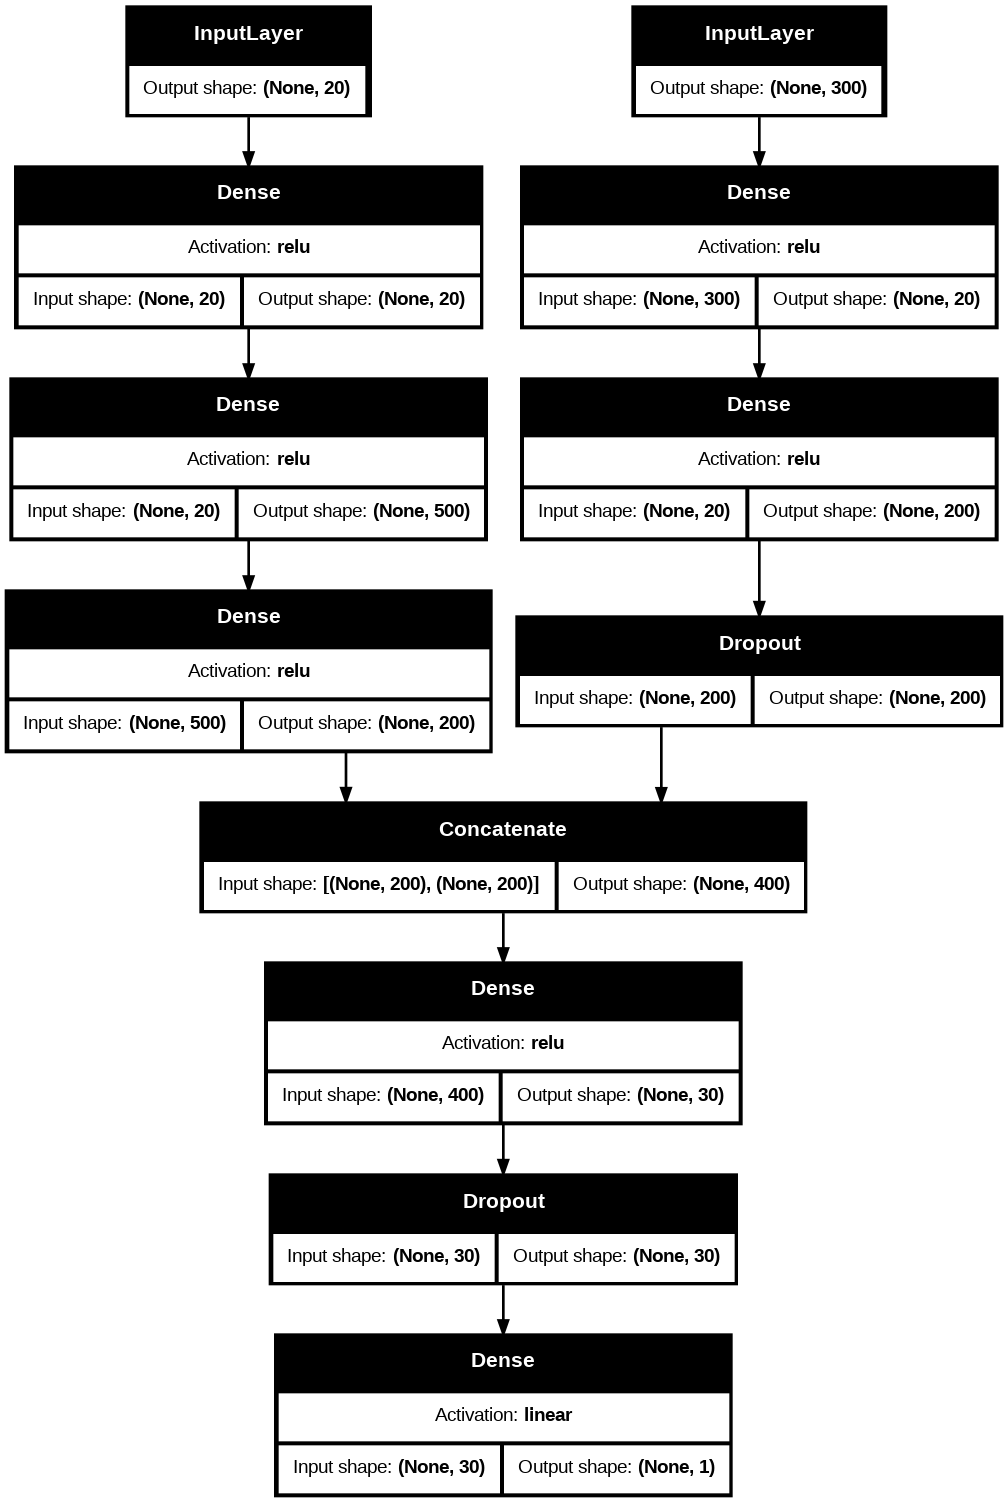

In [ ]:
# Let's take a look at the network diagram
utils.plot_model(model, dpi=96, show_shapes=True, show_layer_activations=True)

# Model training

In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-5), loss='mse', metrics=['mae'])

history = model.fit([x_train_scaled[1854:], x_train_model[1854:]],
                    y_train_scaled[1854:],
                    batch_size=64,
                    epochs=100,
                    validation_data=([x_train_scaled[:1854], x_train_model[:1854]], y_train_scaled[:1854]),
                    verbose=1)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 438ms/step - loss: 1.5891 - mae: 1.2505 - val_loss: 0.8609 - val_mae: 0.7416
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 1.5708 - mae: 1.2431 - val_loss: 0.8706 - val_mae: 0.7443
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.5450 - mae: 1.2322 - val_loss: 0.8808 - val_mae: 0.7470
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.5176 - mae: 1.2212 - val_loss: 0.8914 - val_mae: 0.7499
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.4604 - mae: 1.1975 - val_loss: 0.9027 - val_mae: 0.7529
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.4266 - mae: 1.1835 - val_loss: 0.9145 - val_mae: 0.7561
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.4069 - mae: 1.1738 - val_loss: 0.9269 - val_mae: 0.7595
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.3827 - mae: 1.1638 - val_loss: 0.9400 - val_mae: 0.7632
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.3125 - mae:

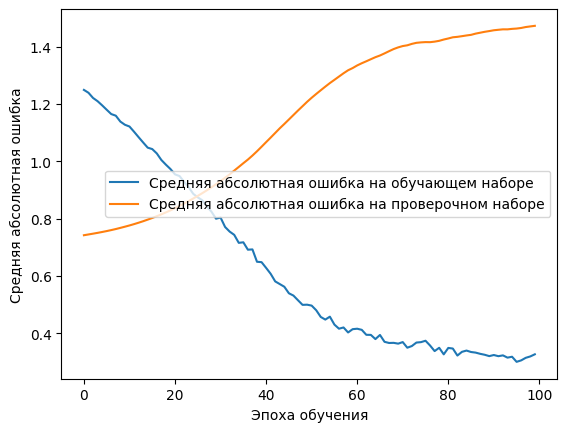

In [ ]:
plt.plot(history.history['mae'], label='Mean absolute error on training set')
plt.plot(history.history['val_mae'], label='Average absolute error on the validation set')
plt.xlabel('Training epoch')
plt.ylabel('Mean absolute error')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Средняя абсолютная ошибка: 0.0433254942035675 

Реальное значение:   1.25  Предсказанное значение:   1.27  Разница:   0.02
Реальное значение:   1.25  Предсказанное значение:   1.25  Разница:   0.00
Реальное значение:   1.25  Предсказанное значение:   1.28  Разница:   0.03
Реальное значение:   1.25  Предсказанное значение:   1.31  Разница:   0.06
Реальное значение:   1.25  Предсказанное значение:   1.28  Разница:   0.03
Реальное значение:   1.26  Предсказанное значение:   1.20  Разница:   0.06
Реальное значение:   1.26  Предсказанное значение:   1.47  Разница:   0.21
Реальное значение:   1.26  Предсказанное значение:   1.39  Разница:   0.13
Реальное значение:   1.26  Предсказанное значение:   1.34  Разница:   0.08
Реальное значение:   1.26  Предсказанное значение:   1.35  Разница:   0.09


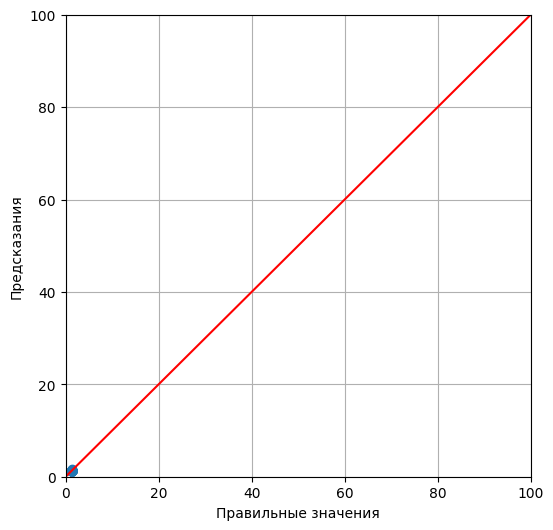

In [ ]:
pred = model.predict([x_train_scaled[1854:1954], x_train_model[1854:1954]])

pred = y_scaler.inverse_transform(pred) # Inverse normalization procedure

print('Mean absolute error:', mean_absolute_error(pred, y_train[1854:1954]), '\n') # calculate mean absolute error

for i in range(10):
    print('Actual value: {:6.2f} Predicted value: {:6.2f} Difference: {:6.2f}'.format(y_train[1854:1954][i, 0],
                                                                                                pred[i, 0],
                                                                                                abs(y_train[1854:1954][i, 0] - pred[i, 0]))))
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(y_train[1854:1954], pred) # Draw the dot plot
ax.set_xlim(0, 100) # x-axis constraint
ax.set_ylim(0, 100) # Limit axis by x
ax.plot(plt.xlim(), plt.ylim(), 'r') # Draw diagonal line
plt.xlabel('Correct values')
plt.ylabel('Predictions')
plt.grid()
plt.show()

In [ ]:
# Calculate the average error rate on the validation sample
MEAN_ERROR = (mean_absolute_error(pred, y_train[1854:1954]) * 1000)/(cars['price']).mean() * 100

print(f'Average error rate on the validation sample: {MEAN_ERROR:.2f}%')

Cредний процент ошибки на проверочной выборке: 4.46%
